In [42]:
# model_training.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

In [43]:

import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'A_year_of_pizza_sales_from_a_pizza_place_872_68 (1).csv'
df = pd.read_csv(file_path)

# Display the contents of the CSV file
df

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...,...
49569,49570,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [44]:

df = df.drop(['Unnamed: 0','X','id'], axis=1)
df.columns

Index(['date', 'time', 'name', 'size', 'type', 'price'], dtype='object')

In [45]:
df.head(2)

,date,time,name,size,type,price
0,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2015-01-01,11:57:40,classic_dlx,M,classic,16.00


In [46]:

df['date'] = pd.to_datetime(df['date'])
df.head(1)

,date,time,name,size,type,price
0,2015-01-01,11:38:36,hawaiian,M,classic,13.25


In [47]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month and day into separate columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Display the DataFrame with the new columns
df.head()

,date,time,name,size,type,price,month,day
0,2015-01-01,11:38:36,hawaiian,M,classic,13.25,1,1
1,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,1,1
2,2015-01-01,11:57:40,mexicana,M,veggie,16.00,1,1
3,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,1,1
4,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,1,1


In [48]:

# Extracting only the hour part from the 'time' column
df['hour'] = df['time'].str.split(':').str[0]

# Displaying the result
print(df['hour'])

0        11
1        11
2        11
3        11
4        11
         ..
49569    21
49570    21
49571    21
49572    22
49573    23
Name: hour, Length: 49574, dtype: object


In [49]:
df.head(2)

,date,time,name,size,type,price,month,day,hour
0,2015-01-01,11:38:36,hawaiian,M,classic,13.25,1,1,11
1,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,1,1,11


In [50]:

import pandas as pd

# Columns to be removed
columns_to_remove = ['date', 'time', 'day']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

print(df)

              name size     type  price  month hour
0         hawaiian    M  classic  13.25      1   11
1      classic_dlx    M  classic  16.00      1   11
2         mexicana    M   veggie  16.00      1   11
3         thai_ckn    L  chicken  20.75      1   11
4      five_cheese    L   veggie  18.50      1   11
...            ...  ...      ...    ...    ...  ...
49569  four_cheese    L   veggie  17.95     12   21
49570   napolitana    S  classic  12.00     12   21
49571  ckn_alfredo    M  chicken  16.75     12   21
49572     mexicana    L   veggie  20.25     12   22
49573      bbq_ckn    S  chicken  12.75     12   23

[49574 rows x 6 columns]


In [51]:
df.head(2)

,name,size,type,price,month,hour
0,hawaiian,M,classic,13.25,1,11
1,classic_dlx,M,classic,16.00,1,11


In [52]:
'''from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
le_name = LabelEncoder()
df['name'] = le_name.fit_transform(df['name'])

le_size = LabelEncoder()
df['size'] = le_size.fit_transform(df['size'])

le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])'''


"from sklearn.preprocessing import LabelEncoder\n\n# Encoding categorical features\nle_name = LabelEncoder()\ndf['name'] = le_name.fit_transform(df['name'])\n\nle_size = LabelEncoder()\ndf['size'] = le_size.fit_transform(df['size'])\n\nle_type = LabelEncoder()\ndf['type'] = le_type.fit_transform(df['type'])"

In [53]:
'''df.head(3)'''

'df.head(3)'

In [54]:

# Preprocessing (e.g., encoding categorical variables)
'''df['name'] = df['name'].astype('category').cat.codes
df['size'] = df['size'].astype('category').cat.codes
df['type'] = df['type'].astype('category').cat.codes
df['price'] = df['price'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['hour'] = df['hour'].astype('category').cat.codes'''



"df['name'] = df['name'].astype('category').cat.codes\ndf['size'] = df['size'].astype('category').cat.codes\ndf['type'] = df['type'].astype('category').cat.codes\ndf['price'] = df['price'].astype('category').cat.codes\ndf['month'] = df['month'].astype('category').cat.codes\ndf['hour'] = df['hour'].astype('category').cat.codes"

In [55]:
df

,name,size,type,price,month,hour
0,hawaiian,M,classic,13.25,1,11
1,classic_dlx,M,classic,16.00,1,11
2,mexicana,M,veggie,16.00,1,11
3,thai_ckn,L,chicken,20.75,1,11
4,five_cheese,L,veggie,18.50,1,11
...,...,...,...,...,...,...
49569,four_cheese,L,veggie,17.95,12,21
49570,napolitana,S,classic,12.00,12,21
49571,ckn_alfredo,M,chicken,16.75,12,21
49572,mexicana,L,veggie,20.25,12,22


In [56]:
df.columns

Index(['name', 'size', 'type', 'price', 'month', 'hour'], dtype='object')

In [57]:
import joblib

model = joblib.load("DecisionTreeModel.pkl")
model

DecisionTreeClassifier(random_state=42)

In [58]:
'''

SyntaxError: EOF while scanning triple-quoted string literal (3857640367.py, line 1)

In [ ]:
df.head(2)

,name,size,type,price,month,hour
0,11,1,1,7,0,11
1,7,1,1,11,0,11


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2214
           1       1.00      1.00      1.00      2986
           2       1.00      1.00      1.00      2391
           3       1.00      1.00      1.00      2324

    accuracy                           1.00      9915
   macro avg       1.00      1.00      1.00      9915
weighted avg       1.00      1.00      1.00      9915



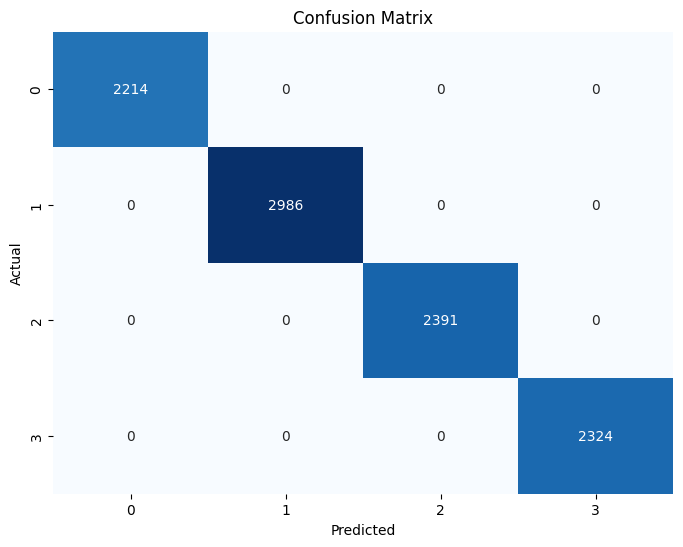

Model saved as DecisionTreeModel.pkl


In [ ]:
# model_training.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the CSV file into a DataFrame
file_path = 'A_year_of_pizza_sales_from_a_pizza_place_872_68 (1).csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'X', 'id'], axis=1)

# Convert the 'date' column to datetime format and extract month and day
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Extract the hour from the 'time' column and drop 'date', 'time', and 'day' columns
df['hour'] = df['time'].str.split(':').str[0].astype(int)
columns_to_remove = ['date', 'time', 'day']
df = df.drop(columns=columns_to_remove)

# Encoding categorical variables
df['name'] = df['name'].astype('category').cat.codes
df['size'] = df['size'].astype('category').cat.codes
df['type'] = df['type'].astype('category').cat.codes
df['price'] = df['price'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes

# Splitting the data into features (X_dt) and target (y_dt)
X_dt = df.drop(columns=['type'])  # Features except the target 'type'
y_dt = df['type']  # Target variable 'type'

# Splitting the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_dt, y_train_dt)

# Making predictions
y_pred_dt = model_dt.predict(X_test_dt)

# Calculating evaluation metrics
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.2f}')

# Printing classification report
print(classification_report(y_test_dt, y_pred_dt))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_dt, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving the model as DecisionTreeModel.pkl
joblib.dump(model_dt, 'DecisionTreeModel.pkl')
print("Model saved as DecisionTreeModel.pkl")


In [60]:
# model_training.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the CSV file into a DataFrame
file_path = 'A_year_of_pizza_sales_from_a_pizza_place_872_68 (1).csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'X', 'id'], axis=1)

# Convert the 'date' column to datetime format and extract month and day
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Extract the hour from the 'time' column and drop 'date', 'time', and 'day' columns
df['hour'] = df['time'].str.split(':').str[0].astype(int)
columns_to_remove = ['date', 'time', 'day']
df = df.drop(columns=columns_to_remove)

# Encoding categorical variables
'''df['name'] = df['name'].astype('category').cat.codes
df['size'] = df['size'].astype('category').cat.codes
df['type'] = df['type'].astype('category').cat.codes
df['price'] = df['price'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes'''






# Encoding categorical variables
df['name'] = df['name'].astype('category')
df['size'] = df['size'].astype('category')
df['type'] = df['type'].astype('category')
df['price'] = df['price'].astype('category')
df['month'] = df['month'].astype('category')

# Show the mapping of encoded values to category names
name_mapping = dict(enumerate(df['name'].cat.categories))
size_mapping = dict(enumerate(df['size'].cat.categories))
type_mapping = dict(enumerate(df['type'].cat.categories))
price_mapping = dict(enumerate(df['price'].cat.categories))
month_mapping = dict(enumerate(df['month'].cat.categories))

# Apply the encoding
df['name'] = df['name'].cat.codes
df['size'] = df['size'].cat.codes
df['type'] = df['type'].cat.codes
df['price'] = df['price'].cat.codes
df['month'] = df['month'].cat.codes

# Display the mappings
print("Name Encoding:", name_mapping)
print("Size Encoding:", size_mapping)
print("Type Encoding:", type_mapping)
print("Price Encoding:", price_mapping)
print("Month Encoding:", month_mapping)


Name Encoding: {0: 'bbq_ckn', 1: 'big_meat', 2: 'brie_carre', 3: 'calabrese', 4: 'cali_ckn', 5: 'ckn_alfredo', 6: 'ckn_pesto', 7: 'classic_dlx', 8: 'five_cheese', 9: 'four_cheese', 10: 'green_garden', 11: 'hawaiian', 12: 'ital_cpcllo', 13: 'ital_supr', 14: 'ital_veggie', 15: 'mediterraneo', 16: 'mexicana', 17: 'napolitana', 18: 'pep_msh_pep', 19: 'pepperoni', 20: 'peppr_salami', 21: 'prsc_argla', 22: 'sicilian', 23: 'soppressata', 24: 'southw_ckn', 25: 'spicy_ital', 26: 'spin_pesto', 27: 'spinach_fet', 28: 'spinach_supr', 29: 'thai_ckn', 30: 'the_greek', 31: 'veggie_veg'}
Size Encoding: {0: 'L', 1: 'M', 2: 'S', 3: 'XL', 4: 'XXL'}
Type Encoding: {0: 'chicken', 1: 'classic', 2: 'supreme', 3: 'veggie'}
Price Encoding: {0: 9.75, 1: 10.5, 2: 11.0, 3: 12.0, 4: 12.25, 5: 12.5, 6: 12.75, 7: 13.25, 8: 14.5, 9: 14.75, 10: 15.25, 11: 16.0, 12: 16.25, 13: 16.5, 14: 16.75, 15: 17.5, 16: 17.95, 17: 18.5, 18: 20.25, 19: 20.5, 20: 20.75, 21: 21.0, 22: 23.65, 23: 25.5, 24: 35.95}
Month Encoding: {0: 1,